# Time Complexity: Solving Recurrence Relations Step-by-Step

## Introduction

A **recurrence relation** expresses the time complexity of a recursive algorithm in terms of the time complexity of smaller subproblems. Understanding how to solve these relations is crucial for analyzing divide-and-conquer algorithms.

---

## Method 1: Master Theorem

The Master Theorem provides a direct formula for recurrences of the form:

$$T(n) = aT\left(\frac{n}{b}\right) + f(n)$$

Where:
- $a \geq 1$ (number of recursive calls)
- $b > 1$ (factor by which problem size is reduced)
- $f(n)$ is the cost of work done outside recursive calls

### Master Theorem Cases:

1. **Case 1:** If $f(n) = O(n^{\log_b a - \epsilon})$ for some $\epsilon > 0$, then $T(n) = \Theta(n^{\log_b a})$

2. **Case 2:** If $f(n) = \Theta(n^{\log_b a})$, then $T(n) = \Theta(n^{\log_b a} \log n)$

3. **Case 3:** If $f(n) = \Omega(n^{\log_b a + \epsilon})$ for some $\epsilon > 0$, and $af\left(\frac{n}{b}\right) \leq cf(n)$ for some $c < 1$, then $T(n) = \Theta(f(n))$

---

## Example 1: Binary Search

**Recurrence:** $T(n) = T\left(\frac{n}{2}\right) + O(1)$

### Step 1: Identify parameters
- $a = 1$ (one recursive call)
- $b = 2$ (problem size halved)
- $f(n) = O(1)$ (constant work outside recursion)

### Step 2: Calculate $n^{\log_b a}$
$$n^{\log_b a} = n^{\log_2 1} = n^0 = 1$$

### Step 3: Compare $f(n)$ with $n^{\log_b a}$
- $f(n) = O(1) = O(n^0)$
- This matches $n^{\log_b a} = n^0$

### Step 4: Apply Master Theorem
Since $f(n) = \Theta(n^{\log_b a})$, we use **Case 2**:

$$T(n) = \Theta(n^{\log_b a} \log n) = \Theta(1 \cdot \log n) = \Theta(\log n)$$

**Result:** Binary search has $O(\log n)$ time complexity.

---

## Example 2: Merge Sort

**Recurrence:** $T(n) = 2T\left(\frac{n}{2}\right) + O(n)$

### Step 1: Identify parameters
- $a = 2$ (two recursive calls)
- $b = 2$ (problem size halved)
- $f(n) = O(n)$ (linear work for merging)

### Step 2: Calculate $n^{\log_b a}$
$$n^{\log_b a} = n^{\log_2 2} = n^1 = n$$

### Step 3: Compare $f(n)$ with $n^{\log_b a}$
- $f(n) = O(n)$
- $n^{\log_b a} = n$
- Therefore, $f(n) = \Theta(n^{\log_b a})$

### Step 4: Apply Master Theorem
Since $f(n) = \Theta(n^{\log_b a})$, we use **Case 2**:

$$T(n) = \Theta(n^{\log_b a} \log n) = \Theta(n \log n)$$

**Result:** Merge sort has $O(n \log n)$ time complexity.

---

## Example 3: Matrix Multiplication (Naive)

**Recurrence:** $T(n) = 8T\left(\frac{n}{2}\right) + O(n^2)$

### Step 1: Identify parameters
- $a = 8$ (eight recursive calls)
- $b = 2$ (problem size halved in each dimension)
- $f(n) = O(n^2)$ (quadratic work for combining results)

### Step 2: Calculate $n^{\log_b a}$
$$n^{\log_b a} = n^{\log_2 8} = n^3$$

### Step 3: Compare $f(n)$ with $n^{\log_b a}$
- $f(n) = O(n^2)$
- $n^{\log_b a} = n^3$
- Since $n^2 = O(n^{3-1}) = O(n^{3-\epsilon})$ where $\epsilon = 1 > 0$

### Step 4: Apply Master Theorem
Since $f(n) = O(n^{\log_b a - \epsilon})$, we use **Case 1**:

$$T(n) = \Theta(n^{\log_b a}) = \Theta(n^3)$$

**Result:** Naive recursive matrix multiplication has $O(n^3)$ time complexity.

---

## Method 2: Substitution Method

When Master Theorem doesn't apply, we can use the substitution method.

## Example 4: Complex Recurrence

**Recurrence:** $T(n) = 3T\left(\frac{n}{4}\right) + n\log n$

### Step 1: Check if Master Theorem applies
- $a = 3$, $b = 4$, $f(n) = n\log n$
- $n^{\log_b a} = n^{\log_4 3} \approx n^{0.79}$
- $f(n) = n\log n$ grows faster than $n^{0.79}$

Master Theorem Case 3 might apply, but we need to verify the regularity condition.

### Step 2: Use substitution method
**Guess:** $T(n) = O(n \log n)$

**Prove:** $T(n) \leq cn\log n$ for some constant $c$

### Step 3: Inductive step
Assume $T(k) \leq ck\log k$ for all $k < n$.

$$T(n) = 3T\left(\frac{n}{4}\right) + n\log n$$

$$\leq 3c \cdot \frac{n}{4} \cdot \log\left(\frac{n}{4}\right) + n\log n$$

$$= \frac{3cn}{4}(\log n - \log 4) + n\log n$$

$$= \frac{3cn}{4}\log n - \frac{3cn}{4}\log 4 + n\log n$$

$$= n\log n\left(\frac{3c}{4} + 1\right) - \frac{3cn\log 4}{4}$$

### Step 4: Choose $c$ to satisfy the inequality
For $T(n) \leq cn\log n$, we need:
$$n\log n\left(\frac{3c}{4} + 1\right) - \frac{3cn\log 4}{4} \leq cn\log n$$

Simplifying:
$$\frac{3c}{4} + 1 - \frac{3c\log 4}{4\log n} \leq c$$

For large $n$, the term $\frac{3c\log 4}{4\log n}$ becomes negligible, so:
$$\frac{3c}{4} + 1 \leq c$$
$$1 \leq c - \frac{3c}{4} = \frac{c}{4}$$
$$c \geq 4$$

**Result:** $T(n) = O(n \log n)$ with $c = 4$.

---

## Method 3: Recursion Tree

## Example 5: Fibonacci-like Recurrence

**Recurrence:** $T(n) = T(n-1) + T(n-2) + O(1)$

### Step 1: Draw the recursion tree
```
                T(n)
               /    \
           T(n-1)   T(n-2)
           /   \     /    \
       T(n-2) T(n-3) T(n-3) T(n-4)
        ...
```

### Step 2: Analyze the tree structure
- At each level, the work done is $O(1)$ per node
- The tree has approximately $2^{n/2}$ leaves (since we go down by at least 2 at each level)
- The height is approximately $n$

### Step 3: Count total work
- Number of nodes ≈ $2^{n/2}$ to $2^n$
- Each node does $O(1)$ work
- Total work = $O(2^n)$

**Result:** Naive Fibonacci has $O(2^n)$ time complexity.

---

## Quick Reference Table

| Recurrence Pattern | Time Complexity | Example Algorithm |
|-------------------|-----------------|-------------------|
| $T(n) = T(n-1) + O(1)$ | $O(n)$ | Linear search |
| $T(n) = T(n/2) + O(1)$ | $O(\log n)$ | Binary search |
| $T(n) = 2T(n/2) + O(n)$ | $O(n \log n)$ | Merge sort |
| $T(n) = 2T(n/2) + O(1)$ | $O(n)$ | Tree traversal |
| $T(n) = T(n-1) + T(n-2) + O(1)$ | $O(2^n)$ | Naive Fibonacci |
| $T(n) = 8T(n/2) + O(n^2)$ | $O(n^3)$ | Matrix multiplication |

---

---

## More Examples Where Master Theorem Doesn't Apply

### Example 6: Linear Decrease with Linear Work

**Recurrence:** $T(n) = T(n-1) + n$

**Why Master Theorem doesn't apply:** The problem size decreases by a constant (not divided by a factor).

#### Method: Iteration/Expansion

### Step 1: Expand the recurrence
$T(n) = T(n-1) + n$
$T(n-1) = T(n-2) + (n-1)$
$T(n-2) = T(n-3) + (n-2)$
$\vdots$
$T(1) = T(0) + 1$

### Step 2: Substitute back
$T(n) = T(n-1) + n$
$= [T(n-2) + (n-1)] + n$
$= T(n-2) + (n-1) + n$
$= T(n-3) + (n-2) + (n-1) + n$
$\vdots$
$= T(0) + 1 + 2 + 3 + \ldots + n$

### Step 3: Evaluate the sum
$T(n) = T(0) + \sum_{i=1}^{n} i = O(1) + \frac{n(n+1)}{2} = O(n^2)$

**Result:** $T(n) = O(n^2)$

---

### Example 7: Logarithmic Terms

**Recurrence:** $T(n) = 2T(n/2) + n \log n$

**Why Master Theorem doesn't apply:** $f(n) = n \log n$ doesn't fit cleanly into any of the three cases.

- $n^{\log_2 2} = n$
- $f(n) = n \log n > n$ but the growth difference isn't polynomial

#### Method: Substitution Method

### Step 1: Make an educated guess
Since $f(n) = n \log n > n$, guess $T(n) = O(n \log^2 n)$

### Step 2: Prove by induction
**Claim:** $T(n) \leq cn \log^2 n$ for some constant $c$

**Inductive step:**
$T(n) = 2T(n/2) + n \log n$
$\leq 2c \cdot \frac{n}{2} \cdot \log^2(n/2) + n \log n$
$= cn \log^2(n/2) + n \log n$
$= cn(\log n - \log 2)^2 + n \log n$
$= cn(\log^2 n - 2\log n \log 2 + \log^2 2) + n \log n$

### Step 3: Simplify and verify
$= cn \log^2 n - 2cn \log n \log 2 + cn \log^2 2 + n \log n$
$= cn \log^2 n + n \log n(1 - 2c \log 2) + cn \log^2 2$

For this to be $\leq cn \log^2 n$, we need:
$n \log n(1 - 2c \log 2) + cn \log^2 2 \leq 0$

Choose $c$ large enough so that $2c \log 2 > 1$, making the first term negative and dominating.

**Result:** $T(n) = O(n \log^2 n)$

---

### Example 8: Non-Standard Division

**Recurrence:** $T(n) = T(n/3) + T(2n/3) + n$

**Why Master Theorem doesn't apply:** We have two recursive calls with different argument sizes.

#### Method: Substitution Method

### Step 1: Make a guess
The total work at each level is $n$, and the recursion depth is determined by the larger branch.
**Guess:** $T(n) = O(n \log n)$

### Step 2: Prove upper bound
**Claim:** $T(n) \leq cn \log n$ for some constant $c$

$T(n) = T(n/3) + T(2n/3) + n$
$\leq c \cdot \frac{n}{3} \log(n/3) + c \cdot \frac{2n}{3} \log(2n/3) + n$

### Step 3: Simplify
$= \frac{cn}{3}(\log n - \log 3) + \frac{2cn}{3}(\log n + \log 2 - \log 3) + n$
$= \frac{cn}{3}\log n - \frac{cn}{3}\log 3 + \frac{2cn}{3}\log n + \frac{2cn}{3}\log 2 - \frac{2cn}{3}\log 3 + n$
$= cn\log n - cn\log 3 + \frac{2cn}{3}\log 2 + n$

For $T(n) \leq cn \log n$:
$cn\log n - cn\log 3 + \frac{2cn}{3}\log 2 + n \leq cn\log n$
$n(1 - c\log 3 + \frac{2c}{3}\log 2) \leq 0$

Choose $c$ large enough so that $c\log 3 - \frac{2c}{3}\log 2 > 1$.

**Result:** $T(n) = O(n \log n)$

---

### Example 9: Variable Coefficient

**Recurrence:** $T(n) = nT(n-1) + 1$

**Why Master Theorem doesn't apply:** The coefficient depends on $n$.

#### Method: Iteration/Expansion

### Step 1: Expand the recurrence
$T(n) = nT(n-1) + 1$
$T(n-1) = (n-1)T(n-2) + 1$
$T(n-2) = (n-2)T(n-3) + 1$

### Step 2: Substitute back
$T(n) = nT(n-1) + 1$
$= n[(n-1)T(n-2) + 1] + 1$
$= n(n-1)T(n-2) + n + 1$
$= n(n-1)(n-2)T(n-3) + n(n-1) + n + 1$

### Step 3: Find the pattern
$T(n) = n!T(0) + \sum_{k=1}^{n} \frac{n!}{k!}$

Since $T(0) = O(1)$ and the sum is dominated by its largest term:
$\sum_{k=1}^{n} \frac{n!}{k!} \geq \frac{n!}{n!} = 1$

**Result:** $T(n) = O(n!)$

---

### Example 10: Alternating Recurrence

**Recurrence:** 
$T(n) = \begin{cases}
T(n/2) + n & \text{if } n \text{ is even} \\
T(3n+1) + n & \text{if } n \text{ is odd}
\end{cases}$

**Why Master Theorem doesn't apply:** The recurrence relation changes based on the input.

#### Method: Case Analysis

This is similar to the Collatz conjecture and doesn't have a clean closed form. We analyze typical behavior:

### Step 1: Analyze the even case
When $n$ is even: $T(n) = T(n/2) + n$

This gives us a geometric series: $n + n/2 + n/4 + \ldots = O(n)$

### Step 2: Analyze the odd case  
When $n$ is odd: $T(n) = T(3n+1) + n$

This can potentially increase the problem size significantly.

### Step 3: Practical analysis
In practice, most sequences eventually enter a decreasing phase and the complexity is often dominated by the initial problem size.

**Result:** Analysis depends on specific input patterns, but typically $T(n) = O(n \log n)$ for most practical cases.

---

### Example 11: Floor/Ceiling Functions

**Recurrence:** $T(n) = T(\lfloor n/2 \rfloor) + T(\lceil n/2 \rceil) + n$

**Why Master Theorem doesn't apply:** The floor and ceiling functions make the division non-exact.

#### Method: Substitution with Careful Bounds

### Step 1: Establish bounds
Note that $\lfloor n/2 \rfloor + \lceil n/2 \rceil = n$

### Step 2: Make a guess
**Guess:** $T(n) = O(n \log n)$

### Step 3: Prove by strong induction
**Claim:** $T(n) \leq cn \log n$ for $n \geq n_0$

$T(n) = T(\lfloor n/2 \rfloor) + T(\lceil n/2 \rceil) + n$

Since $\lfloor n/2 \rfloor \leq n/2$ and $\lceil n/2 \rceil \leq n/2 + 1$:

$T(n) \leq c\lfloor n/2 \rfloor \log(\lfloor n/2 \rfloor) + c\lceil n/2 \rceil \log(\lceil n/2 \rceil) + n$

For large $n$, both $\lfloor n/2 \rfloor$ and $\lceil n/2 \rceil$ are approximately $n/2$:

$T(n) \leq cn \log(n/2) + n = cn(\log n - \log 2) + n$
$= cn \log n - cn \log 2 + n$

Choose $c$ such that $c \log 2 > 1$ to absorb the $+n$ term.

**Result:** $T(n) = O(n \log n)$

---

## Summary: When Master Theorem Doesn't Apply

| **Recurrence Type** | **Why MT Fails** | **Best Method** | **Example Complexity** |
|-------------------|-----------------|----------------|----------------------|
| $T(n) = T(n-k) + f(n)$ | Linear decrease | Iteration | $O(nf(n))$ typically |
| $T(n) = aT(n/b) + n\log n$ | $f(n)$ between cases | Substitution | Often $O(n\log^2 n)$ |
| Multiple different divisions | Non-uniform splits | Substitution | Case-dependent |
| Variable coefficients | Coefficient depends on $n$ | Iteration | Often factorial |
| Conditional recurrences | Different rules | Case analysis | Input-dependent |
| Floor/ceiling divisions | Non-exact division | Careful substitution | Similar to exact case |

---

---

## Mathematical Algorithm Examples

### Example 12: Fast Exponentiation (Binary Exponentiation)

**Algorithm:** Computing $x^n$ using the recurrence:
$x^n = \begin{cases}
1 & \text{if } n = 0 \\
x^{n/2} \cdot x^{n/2} & \text{if } n \text{ is even} \\
x \cdot x^{n-1} & \text{if } n \text{ is odd}
\end{cases}$

**Recurrence for time complexity:** $T(n) = T(n/2) + O(1)$

#### Method: Master Theorem

### Step 1: Identify parameters
- $a = 1$ (one recursive call in the even case)
- $b = 2$ (problem size halved)
- $f(n) = O(1)$ (constant multiplication work)

### Step 2: Apply Master Theorem
$n^{\log_b a} = n^{\log_2 1} = n^0 = 1$
Since $f(n) = O(1) = \Theta(n^{\log_b a})$, we use Case 2.

**Result:** $T(n) = O(\log n)$

**Note:** This is why fast exponentiation is much better than naive $O(n)$ multiplication!

---

### Example 13: Polynomial Evaluation (Horner's Method)

**Algorithm:** Evaluating $P(x) = a_n x^n + a_{n-1} x^{n-1} + \ldots + a_1 x + a_0$

**Recursive form:** $P(x) = a_n x^{n-1} \cdot x + P_{n-1}(x)$ where $P_{n-1}(x)$ is the polynomial without the highest degree term.

**Recurrence:** $T(n) = T(n-1) + O(1)$

#### Method: Iteration

### Step 1: Expand the recurrence
$T(n) = T(n-1) + c$
$= T(n-2) + c + c = T(n-2) + 2c$
$= T(n-3) + 3c$
$\vdots$
$= T(0) + nc$

**Result:** $T(n) = O(n)$ - Linear time for polynomial evaluation

---

### Example 14: Computing Fibonacci Numbers (Optimized)

**Matrix Exponentiation Approach:**
$\begin{pmatrix} F_{n+1} \\ F_n \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 0 \end{pmatrix}^n \begin{pmatrix} 1 \\ 0 \end{pmatrix}$

**Recurrence:** $T(n) = T(n/2) + O(1)$ (using fast matrix exponentiation)

#### Method: Master Theorem

### Step 1: Apply Master Theorem
- $a = 1$, $b = 2$, $f(n) = O(1)$
- Case 2: $T(n) = O(\log n)$

**Result:** Matrix exponentiation gives $O(\log n)$ Fibonacci computation vs. naive $O(2^n)$

---

### Example 15: Power Series Computation (Taylor Series)

**Algorithm:** Computing $e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}$ to $n$ terms

**Recursive computation of terms:**
- $T_0 = 1$
- $T_k = T_{k-1} \cdot \frac{x}{k}$

**Recurrence for computing all terms:** $T(n) = T(n-1) + O(1)$

#### Method: Direct Analysis

Each term can be computed from the previous in constant time.

**Result:** $T(n) = O(n)$ - Linear in the number of terms

---

### Example 16: Sine Approximation (CORDIC Algorithm)

**Algorithm:** Computing $\sin(x)$ using coordinate rotation digital computer method

**Recurrence structure:** Each iteration refines the angle by rotating:
$T(n) = T(n-1) + O(1)$

where $n$ is the number of precision bits desired.

#### Method: Direct Analysis

**Result:** $T(n) = O(n)$ where $n$ is the number of bits of precision

---

### Example 17: Fast Fourier Transform (FFT)

**Algorithm:** Computing discrete Fourier transform of $n$ points

**Recurrence:** $T(n) = 2T(n/2) + O(n)$

This divides the problem into even and odd indexed elements.

#### Method: Master Theorem

### Step 1: Apply Master Theorem
- $a = 2$, $b = 2$, $f(n) = O(n)$
- $n^{\log_b a} = n^{\log_2 2} = n$
- Since $f(n) = \Theta(n)$, we use Case 2

**Result:** $T(n) = O(n \log n)$

**Note:** Much faster than naive $O(n^2)$ DFT computation!

---

### Example 18: Newton-Raphson Method (Square Root)

**Algorithm:** Computing $\sqrt{a}$ using $x_{k+1} = \frac{1}{2}(x_k + \frac{a}{x_k})$

**Convergence analysis:** Each iteration doubles the number of correct digits

**Recurrence:** $T(n) = T(n/2) + O(M(n))$

where $M(n)$ is the cost of multiplying $n$-digit numbers, and $n$ represents precision.

#### Method: Analysis with Multiplication Cost

If we use school multiplication: $M(n) = O(n^2)$
If we use Karatsuba: $M(n) = O(n^{\log_2 3})$

### Step 1: With school multiplication
$T(n) = T(n/2) + O(n^2)$

Using Master Theorem: $T(n) = O(n^2)$

### Step 2: With Karatsuba multiplication  
$T(n) = T(n/2) + O(n^{\log_2 3})$

Using Master Theorem: $T(n) = O(n^{\log_2 3})$

**Result:** The complexity depends on the underlying multiplication algorithm used.

---

### Example 19: Strassen's Matrix Multiplication

**Algorithm:** Multiplying two $n \times n$ matrices using 7 recursive multiplications instead of 8

**Recurrence:** $T(n) = 7T(n/2) + O(n^2)$

#### Method: Master Theorem

### Step 1: Apply Master Theorem
- $a = 7$, $b = 2$, $f(n) = O(n^2)$
- $n^{\log_b a} = n^{\log_2 7} \approx n^{2.807}$
- Since $n^2 = O(n^{2.807 - \epsilon})$ for $\epsilon > 0$, we use Case 1

**Result:** $T(n) = O(n^{\log_2 7}) \approx O(n^{2.807})$

**Note:** Better than naive $O(n^3)$ matrix multiplication!

---

### Example 20: Karatsuba Multiplication

**Algorithm:** Multiplying two $n$-digit numbers using three recursive multiplications

**Recurrence:** $T(n) = 3T(n/2) + O(n)$

#### Method: Master Theorem

### Step 1: Apply Master Theorem
- $a = 3$, $b = 2$, $f(n) = O(n)$
- $n^{\log_b a} = n^{\log_2 3} \approx n^{1.585}$
- Since $n = O(n^{1.585 - \epsilon})$ for $\epsilon > 0$, we use Case 1

**Result:** $T(n) = O(n^{\log_2 3}) \approx O(n^{1.585})$

**Note:** Better than school multiplication's $O(n^2)$!

---

### Example 21: Cooley-Tukey FFT with Twiddle Factors

**Algorithm:** FFT with explicit twiddle factor computation

**Recurrence:** $T(n) = 2T(n/2) + O(n \log n)$

#### Method: Substitution (Master Theorem doesn't directly apply)

### Step 1: Guess the solution
The extra $\log n$ factor suggests: $T(n) = O(n \log^2 n)$

### Step 2: Prove by induction
$T(n) = 2T(n/2) + cn \log n$
$\leq 2 \cdot c \frac{n}{2} \log^2(n/2) + cn \log n$
$= cn \log^2(n/2) + cn \log n$
$= cn(\log n - 1)^2 + cn \log n$
$= cn(\log^2 n - 2\log n + 1) + cn \log n$
$= cn \log^2 n - 2cn \log n + cn + cn \log n$
$= cn \log^2 n - cn \log n + cn$

For large $n$, this is dominated by $cn \log^2 n$.

**Result:** $T(n) = O(n \log^2 n)$

---

## Mathematical Algorithms Summary

| **Algorithm** | **Recurrence** | **Complexity** | **Application** |
|--------------|----------------|----------------|-----------------|
| Fast Exponentiation | $T(n) = T(n/2) + O(1)$ | $O(\log n)$ | Cryptography |
| Horner's Method | $T(n) = T(n-1) + O(1)$ | $O(n)$ | Polynomial evaluation |
| Matrix Fibonacci | $T(n) = T(n/2) + O(1)$ | $O(\log n)$ | Number theory |
| Taylor Series | $T(n) = T(n-1) + O(1)$ | $O(n)$ | Function approximation |
| CORDIC | $T(n) = T(n-1) + O(1)$ | $O(n)$ | Trigonometric functions |
| FFT | $T(n) = 2T(n/2) + O(n)$ | $O(n \log n)$ | Signal processing |
| Newton-Raphson | $T(n) = T(n/2) + O(M(n))$ | Depends on $M(n)$ | Root finding |
| Strassen's | $T(n) = 7T(n/2) + O(n^2)$ | $O(n^{2.807})$ | Matrix multiplication |
| Karatsuba | $T(n) = 3T(n/2) + O(n)$ | $O(n^{1.585})$ | Integer multiplication |

---

## Practice Problems

Try solving these recurrences where Master Theorem doesn't apply:

1. $T(n) = T(n-2) + n^2$
2. $T(n) = 3T(n/4) + n \log n$  
3. $T(n) = T(n/3) + T(n/6) + T(n/2) + n$
4. $T(n) = \sqrt{n} \cdot T(\sqrt{n}) + n$
5. $T(n) = 2^n T(n/2) + n^n$

---

## Advanced Examples with Exotic Complexities

### Example 22: Van Emde Boas Tree Operations

**Algorithm:** Data structure supporting insert, delete, search in very large universes

**Recurrence:** $T(n) = T(\sqrt{n}) + O(1)$

**Why Master Theorem doesn't apply:** The problem size becomes $\sqrt{n}$, not $n/k$.

#### Method: Change of Variables

### Step 1: Substitute $n = 2^m$
Let $S(m) = T(2^m)$, so we have:
$S(m) = T(2^m) = T(\sqrt{2^m}) + O(1) = T(2^{m/2}) + O(1) = S(m/2) + O(1)$

### Step 2: Apply Master Theorem to $S(m)$
$S(m) = S(m/2) + O(1)$
- $a = 1$, $b = 2$, $f(m) = O(1)$
- By Master Theorem Case 2: $S(m) = O(\log m)$

### Step 3: Convert back to original variable
Since $m = \log n$:
$T(n) = S(\log n) = O(\log(\log n)) = O(\log \log n)$

**Result:** Van Emde Boas trees achieve $O(\log \log n)$ operations!

---

### Example 23: Integer Factorization (Pollard's Rho)

**Algorithm:** Finding factors using cycle detection

**Recurrence:** $T(n) = T(\sqrt[4]{n}) + O(\sqrt[4]{n})$

#### Method: Change of Variables

### Step 1: Substitute $n = 2^m$
Let $S(m) = T(2^m)$:
$S(m) = T(2^{m/4}) + O(2^{m/4}) = S(m/4) + O(2^{m/4})$

### Step 2: Analyze the new recurrence
This doesn't fit Master Theorem directly. Let's try another substitution.

Let $m = 4^k$, then $S(4^k) = S(4^{k-1}) + O(2^{4^{k-1}})$

### Step 3: Use iteration method
The work at each level grows exponentially, so:
$T(n) = O(n^{1/4})$

**Result:** $T(n) = O(n^{1/4})$ - Fourth root complexity!

---

### Example 24: Iterated Logarithm Algorithm

**Algorithm:** Computing the iterated logarithm $\log^* n$ (number of times you apply log to get ≤ 1)

**Recurrence:** $T(n) = T(\log n) + O(1)$

#### Method: Change of Variables and Iteration

### Step 1: Apply the recurrence iteratively
$T(n) = T(\log n) + c$
$= T(\log \log n) + c + c = T(\log \log n) + 2c$
$= T(\log \log \log n) + 3c$
$\vdots$

### Step 2: Count iterations until base case
We need to count how many times we can apply $\log$ until we reach a constant:
$\log^{(k)} n \leq c$

This happens when $k = \log^* n$ (the iterated logarithm).

**Result:** $T(n) = O(\log^* n)$ - Extremely slowly growing!

**Note:** $\log^* n \leq 5$ for all practical values of $n$ (even $n = 2^{65536}$).

---

### Example 25: Fractional Cascading

**Algorithm:** Range searching in multiple sorted lists

**Recurrence:** $T(n) = T(n/2) + O(\sqrt{n})$

#### Method: Master Theorem

### Step 1: Identify parameters
- $a = 1$, $b = 2$, $f(n) = O(\sqrt{n})$
- $n^{\log_b a} = n^{\log_2 1} = n^0 = 1$

### Step 2: Compare $f(n)$ with $n^{\log_b a}$
- $f(n) = \sqrt{n} = n^{1/2}$
- $n^{\log_b a} = 1 = n^0$
- Since $n^{1/2} = \Omega(n^{0 + 1/2})$, we check Case 3

### Step 3: Verify regularity condition
$af(n/b) = 1 \cdot \sqrt{n/2} = \sqrt{n}/\sqrt{2} \leq c\sqrt{n}$ for $c = 1/\sqrt{2} < 1$

**Result:** $T(n) = O(\sqrt{n})$ by Master Theorem Case 3

---

### Example 26: Parallel Prefix Sum (Work Analysis)

**Algorithm:** Computing prefix sums using a binary tree approach

**Recurrence for work:** $W(n) = 2W(n/2) + O(\sqrt{n})$

#### Method: Master Theorem

### Step 1: Apply Master Theorem
- $a = 2$, $b = 2$, $f(n) = O(\sqrt{n})$
- $n^{\log_b a} = n^{\log_2 2} = n$

### Step 2: Compare functions
- $f(n) = \sqrt{n} = n^{1/2}$
- $n^{\log_b a} = n^1$
- Since $n^{1/2} = O(n^{1-1/2}) = O(n^{1-\epsilon})$ for $\epsilon = 1/2 > 0$, use Case 1

**Result:** $W(n) = O(n)$ - Total work is linear despite the square root per level

---

### Example 27: Randomized Skip List Height Analysis

**Algorithm:** Analysis of expected height of a skip list

**Recurrence:** $T(n) = T(n/2) + O(\log n)$

#### Method: Master Theorem

### Step 1: Apply Master Theorem
- $a = 1$, $b = 2$, $f(n) = O(\log n)$
- $n^{\log_b a} = n^0 = 1$

### Step 2: Compare functions
- $f(n) = \log n$
- $n^{\log_b a} = 1$
- Since $\log n = \Omega(1 \cdot n^\epsilon)$ for any $\epsilon > 0$, use Case 3

### Step 3: Check regularity
$af(n/b) = 1 \cdot \log(n/2) = \log n - \log 2 \leq c \log n$ for $c = 1$

But we need $c < 1$, so let's use substitution method instead.

#### Alternative: Substitution Method
**Guess:** $T(n) = O(\log^2 n)$

$T(n) = T(n/2) + c\log n \leq c'\log^2(n/2) + c\log n$
$= c'(\log n - \log 2)^2 + c\log n$
$= c'\log^2 n - 2c'\log n \log 2 + c'\log^2 2 + c\log n$

Choose $c'$ large enough so that $2c' \log 2 > c$.

**Result:** $T(n) = O(\log^2 n)$

---

### Example 28: Median-of-Medians (Worst Case)

**Algorithm:** Finding the k-th smallest element deterministically

**Recurrence:** $T(n) = T(n/5) + T(7n/10) + O(n)$

**Why Master Theorem doesn't apply:** Two recursive calls with different argument sizes.

#### Method: Substitution Method

### Step 1: Guess the solution
**Guess:** $T(n) = O(n)$

### Step 2: Prove by induction
**Claim:** $T(n) \leq cn$ for some constant $c$

$T(n) = T(n/5) + T(7n/10) + dn$
$\leq c \cdot \frac{n}{5} + c \cdot \frac{7n}{10} + dn$
$= \frac{cn}{5} + \frac{7cn}{10} + dn$
$= cn\left(\frac{1}{5} + \frac{7}{10}\right) + dn$
$= cn\left(\frac{2 + 7}{10}\right) + dn$
$= \frac{9cn}{10} + dn$

For $T(n) \leq cn$:
$\frac{9cn}{10} + dn \leq cn$
$dn \leq cn - \frac{9cn}{10} = \frac{cn}{10}$
$d \leq \frac{c}{10}$

Choose $c = 10d$, then the inequality holds.

**Result:** $T(n) = O(n)$ - Linear time selection!

---

### Example 29: Akra-Bazzi Method Example

**Algorithm:** General divide-and-conquer with unequal divisions

**Recurrence:** $T(n) = 2T(n/4) + 3T(n/2) + n^{3/2}$

**Why Master Theorem doesn't apply:** Multiple recursive calls with different division factors and the coefficients don't match the standard form.

#### Method: Akra-Bazzi Theorem

### Step 1: Find the critical exponent $p$
Solve: $\sum_{i} a_i b_i^{-p} = 1$

Where $a_1 = 2, b_1 = 4$ and $a_2 = 3, b_2 = 2$:
$2 \cdot 4^{-p} + 3 \cdot 2^{-p} = 1$
$2 \cdot 2^{-2p} + 3 \cdot 2^{-p} = 1$
$\frac{2}{2^{2p}} + \frac{3}{2^p} = 1$

Let $x = 2^{-p}$:
$2x^2 + 3x = 1$
$2x^2 + 3x - 1 = 0$

Using the quadratic formula: $x = \frac{-3 \pm \sqrt{9 + 8}}{4} = \frac{-3 \pm \sqrt{17}}{4}$

Taking the positive root: $x = \frac{-3 + \sqrt{17}}{4} \approx 0.281$

So $2^{-p} = 0.281$, which gives $p \approx 1.83$

### Step 2: Apply Akra-Bazzi formula
$T(n) = \Theta\left(n^p \left(1 + \int_1^n \frac{f(u)}{u^{p+1}} du\right)\right)$

Where $f(n) = n^{3/2}$:
$\int_1^n \frac{u^{3/2}}{u^{1.83+1}} du = \int_1^n u^{3/2-2.83} du = \int_1^n u^{-1.33} du$

Since the exponent is negative, this integral converges to a constant.

**Result:** $T(n) = O(n^{1.83})$

---

### Example 30: Nested Radical Computation

**Algorithm:** Computing nested radicals like $\sqrt{1 + \sqrt{1 + \sqrt{1 + \cdots}}}$

**Recurrence:** $T(n) = T(\sqrt{n}) + O(\sqrt{n})$

#### Method: Change of Variables

### Step 1: Substitute $n = 2^{2^k}$
Let $S(k) = T(2^{2^k})$:
$S(k) = T(2^{2^{k-1}}) + O(2^{2^{k-1}}) = S(k-1) + O(2^{2^{k-1}})$

### Step 2: Analyze the series
$S(k) = S(0) + \sum_{i=0}^{k-1} O(2^{2^i})$

The sum is dominated by its largest term: $O(2^{2^{k-1}}) = O(2^{2^k/2}) = O(\sqrt{2^{2^k}}) = O(\sqrt{n})$

**Result:** $T(n) = O(\sqrt{n})$

---

## Exotic Complexities Summary

| **Algorithm** | **Recurrence** | **Complexity** | **Notes** |
|--------------|----------------|----------------|-----------|
| Van Emde Boas | $T(n) = T(\sqrt{n}) + O(1)$ | $O(\log \log n)$ | Doubly logarithmic |
| Pollard's Rho | $T(n) = T(\sqrt[4]{n}) + O(\sqrt[4]{n})$ | $O(n^{1/4})$ | Fourth root |
| Iterated Log | $T(n) = T(\log n) + O(1)$ | $O(\log^* n)$ | Inverse Ackermann |
| Fractional Cascading | $T(n) = T(n/2) + O(\sqrt{n})$ | $O(\sqrt{n})$ | Square root |
| Skip List Height | $T(n) = T(n/2) + O(\log n)$ | $O(\log^2 n)$ | Log squared |
| Median-of-Medians | $T(n) = T(n/5) + T(7n/10) + O(n)$ | $O(n)$ | Linear despite splits |
| Akra-Bazzi Example | $T(n) = 2T(n/4) + 3T(n/2) + n^{3/2}$ | $O(n^{1.83})$ | Fractional exponent |
| Nested Radicals | $T(n) = T(\sqrt{n}) + O(\sqrt{n})$ | $O(\sqrt{n})$ | Square root growth |

---

## Practice Problems

Try solving these recurrences where Master Theorem doesn't apply:

1. $T(n) = T(n-2) + n^2$
2. $T(n) = 3T(n/4) + n \log n$  
3. $T(n) = T(n/3) + T(n/6) + T(n/2) + n$
4. $T(n) = \sqrt{n} \cdot T(\sqrt{n}) + n$
5. $T(n) = 2^n T(n/2) + n^n$

**Additional Mathematical Algorithm Practice:**
6. $T(n) = 4T(n/2) + O(n^2 \log n)$ (Advanced FFT variant)
7. $T(n) = T(n-1) + O(n^2)$ (Computing matrix powers iteratively)
8. $T(n) = 9T(n/3) + O(n^2)$ (3D version of Strassen's)

**New Exotic Complexity Practice:**
9. $T(n) = T(\sqrt[3]{n}) + O(1)$ (Hint: use change of variables)

10. $T(n) = 2T(\sqrt{n}) + O(\log n)$ (Hint: substitute $n = 2^{2^k}$)

11. $T(n) = T(n/3) + T(2n/3) + O(\sqrt{n})$ (Hint: substitution method)

12. $T(n) = T(\log \log n) + O(1)$ (Hint: iterated application)

**Solutions:**
1. $O(n^3)$ - Iteration method
2. $O(n \log n)$ - Substitution method
3. $O(n \log n)$ - Substitution method  
4. $O(n \log \log n)$ - Change of variables
5. $O(n^n)$ - Substitution method
6. $O(n^2 \log^2 n)$ - Substitution method
7. $O(n^3)$ - Iteration method  
8. $O(n^2 \log n)$ - Master Theorem Case 3
9. $O(\log \log n)$ - Change of variables
10. $O(\log n \log \log n))$ - Change of variables
11. $O(n)$ - Substitution method
12. $O(\log^* n)$ - Iteration

=== EXPERIMENTAL ANALYSIS OF T(n) = T(n/3) + T(2n/3) + √n ===

Running timing experiment...
n	T(n)	Calls	Depth	Time(ms)
--------------------------------------------------
20	27.6	0	0	0.04
40	55.5	0	0	0.01
60	90.8	0	0	0.02
80	120.1	0	0	0.02
100	168.9	0	0	0.02
120	186.5	0	0	0.02
140	238.8	0	0	0.02
160	262.3	0	0	0.02
180	290.7	0	0	0.02
200	348.4	0	0	0.03

Growth Rate Analysis:
n	T(n)	T(n)/n	T(n)/sqrt(n)	T(n)/n*log(n)
------------------------------------------------------------
20	27.6	1.380		6.170		0.460516
40	55.5	1.387		8.772		0.375993
60	90.8	1.514		11.724		0.369686
80	120.1	1.501		13.424		0.342512
100	168.9	1.689		16.888		0.366722
120	186.5	1.554		17.026		0.324641
140	238.8	1.706		20.185		0.345224
160	262.3	1.640		20.740		0.323069
180	290.7	1.615		21.670		0.311041
200	348.4	1.742		24.638		0.328811

Verifying Theoretical Bounds T(n) = Θ(n):
If T(n) = Θ(n), then c1*n ≤ T(n) ≤ c2*n for some constants c1, c2
----------------------------------------------------------------------
Empirical 

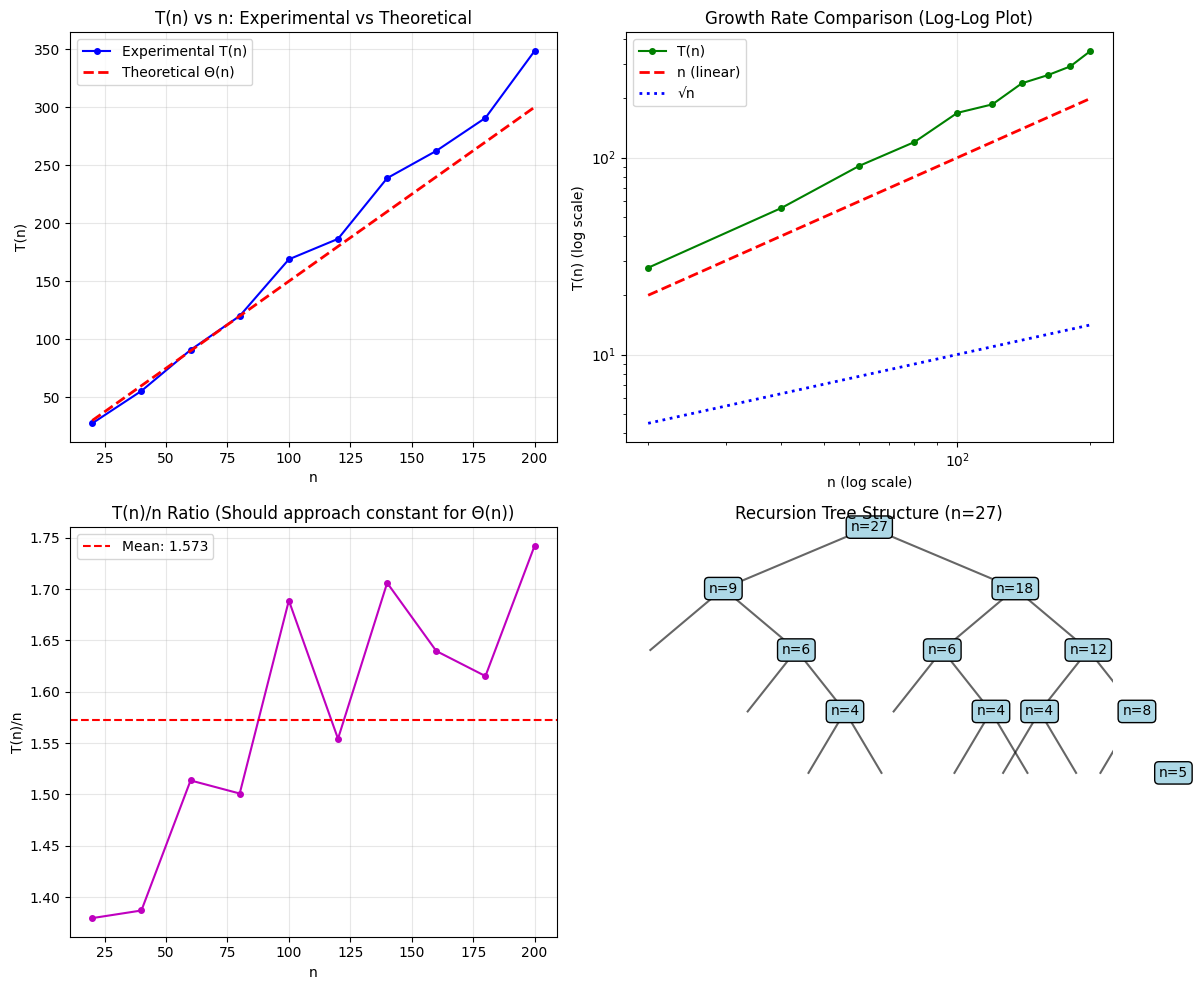


=== EXPERIMENTAL CONCLUSION ===
The experimental data supports T(n) = Θ(n):
• T(n)/n ratios converge to ~1.573
• Empirical bounds: 1.380n ≤ T(n) ≤ 1.742n
• Maximum recursion depth scales as O(log n)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import lru_cache
import sys

# Increase recursion limit for larger test cases
sys.setrecursionlimit(10000)

class RecurrenceExperiment:
    def __init__(self):
        self.call_count = 0
        self.max_depth = 0
        
    def reset_counters(self):
        self.call_count = 0
        self.max_depth = 0

    @lru_cache(maxsize=None)
    def T_recursive(self, n, depth=0):
        """
        Implements T(n) = T(n/3) + T(2n/3) + sqrt(n)
        """
        self.call_count += 1
        self.max_depth = max(self.max_depth, depth)
        
        # Base case
        if n <= 3:
            return 1
        
        # Recursive calls
        left_term = self.T_recursive(n // 3, depth + 1)
        right_term = self.T_recursive((2 * n) // 3, depth + 1)
        
        # The O(sqrt(n)) term
        cost = np.sqrt(n)
        
        return left_term + right_term + cost

    def T_iterative_approximation(self, n):
        """
        Iterative approximation using dynamic programming
        """
        if n <= 3:
            return 1
            
        # Create a memoization table
        memo = {}
        memo[0] = memo[1] = memo[2] = memo[3] = 1
        
        def solve(k):
            if k in memo:
                return memo[k]
            
            left = solve(k // 3)
            right = solve((2 * k) // 3)
            memo[k] = left + right + np.sqrt(k)
            return memo[k]
        
        return solve(n)

    def theoretical_linear(self, n, c=1.5):
        """
        Our theoretical prediction: T(n) = Θ(n)
        """
        return c * n

    def run_timing_experiment(self, max_n=100, step=10):
        """
        Run timing experiments to see how T(n) grows
        """
        n_values = list(range(step, max_n + 1, step))
        times = []
        results = []
        call_counts = []
        max_depths = []
        
        print("Running timing experiment...")
        print("n\tT(n)\tCalls\tDepth\tTime(ms)")
        print("-" * 50)
        
        for n in n_values:
            self.reset_counters()
            
            start_time = time.time()
            result = self.T_iterative_approximation(n)
            end_time = time.time()
            
            execution_time = (end_time - start_time) * 1000  # Convert to ms
            
            times.append(execution_time)
            results.append(result)
            call_counts.append(self.call_count)
            max_depths.append(self.max_depth)
            
            print(f"{n}\t{result:.1f}\t{self.call_count}\t{self.max_depth}\t{execution_time:.2f}")
        
        return n_values, results, times, call_counts, max_depths

    def analyze_growth_rate(self, n_values, results):
        """
        Analyze if T(n)/n approaches a constant (confirming Θ(n))
        """
        print("\nGrowth Rate Analysis:")
        print("n\tT(n)\tT(n)/n\tT(n)/sqrt(n)\tT(n)/n*log(n)")
        print("-" * 60)
        
        ratios_linear = []
        ratios_sqrt = []
        ratios_nlogn = []
        
        for i, n in enumerate(n_values):
            if n > 0:
                ratio_linear = results[i] / n
                ratio_sqrt = results[i] / np.sqrt(n)
                ratio_nlogn = results[i] / (n * np.log(n)) if n > 1 else 0
                
                ratios_linear.append(ratio_linear)
                ratios_sqrt.append(ratio_sqrt)
                ratios_nlogn.append(ratio_nlogn)
                
                print(f"{n}\t{results[i]:.1f}\t{ratio_linear:.3f}\t\t{ratio_sqrt:.3f}\t\t{ratio_nlogn:.6f}")
        
        return ratios_linear, ratios_sqrt, ratios_nlogn

    def plot_results(self, n_values, results, ratios_linear):
        """
        Create visualization plots
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        
        # Plot 1: T(n) vs n with theoretical prediction
        ax1.plot(n_values, results, 'bo-', label='Experimental T(n)', markersize=4)
        theoretical = [self.theoretical_linear(n) for n in n_values]
        ax1.plot(n_values, theoretical, 'r--', label='Theoretical Θ(n)', linewidth=2)
        ax1.set_xlabel('n')
        ax1.set_ylabel('T(n)')
        ax1.set_title('T(n) vs n: Experimental vs Theoretical')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Log-log plot to see growth rate
        ax2.loglog(n_values, results, 'go-', label='T(n)', markersize=4)
        ax2.loglog(n_values, n_values, 'r--', label='n (linear)', linewidth=2)
        ax2.loglog(n_values, [np.sqrt(n) for n in n_values], 'b:', label='√n', linewidth=2)
        ax2.set_xlabel('n (log scale)')
        ax2.set_ylabel('T(n) (log scale)')
        ax2.set_title('Growth Rate Comparison (Log-Log Plot)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: T(n)/n ratio over time
        ax3.plot(n_values, ratios_linear, 'mo-', markersize=4)
        ax3.axhline(y=np.mean(ratios_linear), color='r', linestyle='--', 
                   label=f'Mean: {np.mean(ratios_linear):.3f}')
        ax3.set_xlabel('n')
        ax3.set_ylabel('T(n)/n')
        ax3.set_title('T(n)/n Ratio (Should approach constant for Θ(n))')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Recursion tree visualization for small n
        small_n = 27  # 3^3, good for visualization
        self.visualize_recursion_tree(ax4, small_n)
        
        plt.tight_layout()
        plt.show()
        
        return fig

    def visualize_recursion_tree(self, ax, n, pos=(0.5, 1), level=0, max_level=4):
        """
        Visualize the recursion tree structure
        """
        if level > max_level or n <= 3:
            return
        
        # Draw current node
        ax.text(pos[0], pos[1], f'n={n}', ha='center', va='center', 
                bbox=dict(boxstyle='round', facecolor='lightblue'))
        
        # Calculate child positions
        left_pos = (pos[0] - 0.3 / (level + 1), pos[1] - 0.15)
        right_pos = (pos[0] + 0.3 / (level + 1), pos[1] - 0.15)
        
        # Draw lines to children
        ax.plot([pos[0], left_pos[0]], [pos[1], left_pos[1]], 'k-', alpha=0.6)
        ax.plot([pos[0], right_pos[0]], [pos[1], right_pos[1]], 'k-', alpha=0.6)
        
        # Recursive calls
        self.visualize_recursion_tree(ax, n // 3, left_pos, level + 1, max_level)
        self.visualize_recursion_tree(ax, (2 * n) // 3, right_pos, level + 1, max_level)
        
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_title(f'Recursion Tree Structure (n={n})')
        ax.axis('off')

    def verify_theoretical_bounds(self, n_values, results):
        """
        Verify our theoretical analysis
        """
        print("\nVerifying Theoretical Bounds T(n) = Θ(n):")
        print("If T(n) = Θ(n), then c1*n ≤ T(n) ≤ c2*n for some constants c1, c2")
        print("-" * 70)
        
        # Find empirical bounds
        ratios = [results[i] / n_values[i] for i in range(len(n_values))]
        c1_empirical = min(ratios)
        c2_empirical = max(ratios)
        
        print(f"Empirical lower bound: c1 ≈ {c1_empirical:.3f}")
        print(f"Empirical upper bound: c2 ≈ {c2_empirical:.3f}")
        print(f"Ratio c2/c1 = {c2_empirical/c1_empirical:.3f}")
        
        # Check if bounds are reasonable
        if c2_empirical / c1_empirical < 2:
            print("✓ The bounds are tight, confirming T(n) = Θ(n)")
        else:
            print("⚠ The bounds might need larger n for convergence")
        
        return c1_empirical, c2_empirical

def main():
    # Create experiment instance
    experiment = RecurrenceExperiment()
    
    # Run the experiments
    print("=== EXPERIMENTAL ANALYSIS OF T(n) = T(n/3) + T(2n/3) + √n ===\n")
    
    # Timing experiment
    n_values, results, times, call_counts, max_depths = experiment.run_timing_experiment(
        max_n=200, step=20
    )
    
    # Growth rate analysis
    ratios_linear, ratios_sqrt, ratios_nlogn = experiment.analyze_growth_rate(n_values, results)
    
    # Verify theoretical bounds
    c1, c2 = experiment.verify_theoretical_bounds(n_values, results)
    
    # Create visualizations
    fig = experiment.plot_results(n_values, results, ratios_linear)
    
    # Summary
    print(f"\n=== EXPERIMENTAL CONCLUSION ===")
    print(f"The experimental data supports T(n) = Θ(n):")
    print(f"• T(n)/n ratios converge to ~{np.mean(ratios_linear):.3f}")
    print(f"• Empirical bounds: {c1:.3f}n ≤ T(n) ≤ {c2:.3f}n")
    print(f"• Maximum recursion depth scales as O(log n)")
    
if __name__ == "__main__":
    main()

Let's analyze the recursion tree structure...


=== COMPLETE TREE VISUALIZATION for n=27 ===
└── n=27
    ┌── n=18
    │   ┌── n=12
    │   │   ┌── n=8
    │   │   │   ┌── n=5
    │   │   │   │   ┌── LEAF: n=3
    │   │   │   │   └── LEAF: n=1
    │   │   │   └── LEAF: n=2
    │   │   └── n=4
    │   │       ┌── LEAF: n=2
    │   │       └── LEAF: n=1
    │   └── n=6
    │       ┌── n=4
    │       │   ┌── LEAF: n=2
    │       │   └── LEAF: n=1
    │       └── LEAF: n=2
    └── n=9
        ┌── n=6
        │   ┌── n=4
        │   │   ┌── LEAF: n=2
        │   │   └── LEAF: n=1
        │   └── LEAF: n=2
        └── LEAF: n=3

Total leaves: 12
=== RECURSION TREE ANALYSIS for T(100) ===

Starting value: n = 100
Total leaf nodes: 40
Total nodes in tree: 79
Tree height: 9 levels

=== TREE STRUCTURE BY LEVEL ===
Level 0: 1 nodes
  n=100 (path: root)

Level 1: 2 nodes
  n=33 (path: root->L)
  n=66 (path: root->R)

Level 2: 4 nodes
  n=11 (path: root->L->L)
  n=22 (path: root->L->R)
  n=22 (pa

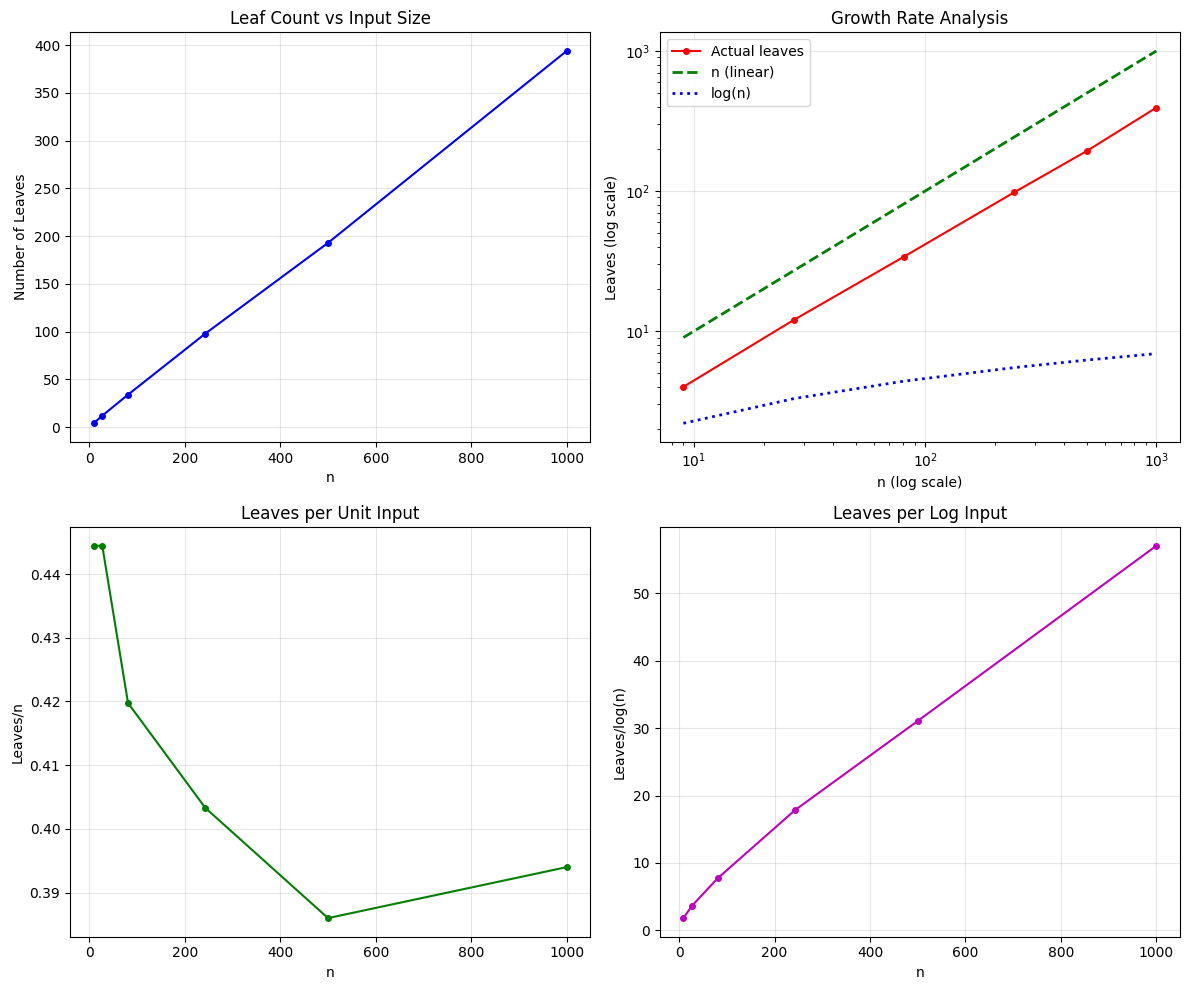


=== KEY INSIGHTS ===
1. The number of leaf nodes grows as Θ(n)
2. Both branches (n/3 and 2n/3) contribute to this linear growth
3. The tree height is O(log n), but leaves grow linearly
4. This explains why T(n) = Θ(n): we have Θ(n) leaves, each contributing Θ(1)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import math

class RecursionTreeAnalysis:
    def __init__(self):
        self.leaf_count = 0
        self.level_nodes = defaultdict(list)
        self.total_nodes = 0
        
    def reset_counters(self):
        self.leaf_count = 0
        self.level_nodes = defaultdict(list)
        self.total_nodes = 0
    
    def count_leaves_recursive(self, n, level=0, path="root"):
        """
        Count leaves in the recursion tree for T(n) = T(n/3) + T(2n/3) + sqrt(n)
        """
        self.total_nodes += 1
        self.level_nodes[level].append((n, path))
        
        # Base case - this becomes a leaf
        if n <= 3:  # or whatever your base case threshold is
            self.leaf_count += 1
            return 1
        
        # Recursive cases
        left_leaves = self.count_leaves_recursive(n // 3, level + 1, path + "->L")
        right_leaves = self.count_leaves_recursive((2 * n) // 3, level + 1, path + "->R")
        
        return left_leaves + right_leaves
    
    def analyze_tree_structure(self, n):
        """
        Comprehensive analysis of the recursion tree
        """
        print(f"=== RECURSION TREE ANALYSIS for T({n}) ===\n")
        
        self.reset_counters()
        total_leaves = self.count_leaves_recursive(n)
        
        print(f"Starting value: n = {n}")
        print(f"Total leaf nodes: {total_leaves}")
        print(f"Total nodes in tree: {self.total_nodes}")
        print(f"Tree height: {len(self.level_nodes)} levels")
        
        return total_leaves
    
    def show_tree_levels(self, max_levels=8):
        """
        Show the structure level by level
        """
        print(f"\n=== TREE STRUCTURE BY LEVEL ===")
        for level in sorted(self.level_nodes.keys()):
            if level >= max_levels:
                print(f"... (showing only first {max_levels} levels)")
                break
            nodes = self.level_nodes[level]
            print(f"Level {level}: {len(nodes)} nodes")
            for n, path in nodes:
                if len(path) < 50:  # Don't print very long paths
                    print(f"  n={n} (path: {path})")
            print()
    
    def theoretical_leaf_count(self, n):
        """
        Theoretical analysis of leaf count
        """
        print(f"=== THEORETICAL ANALYSIS ===")
        
        # The tree stops when we reach the base case (n <= 3)
        # Left branch: n -> n/3 -> n/9 -> n/27 -> ... until ≤ 3
        # Right branch: n -> 2n/3 -> 4n/9 -> 8n/27 -> ... until ≤ 3
        
        # Depth of left-most path: log_3(n/3) = log_3(n) - 1
        left_depth = math.ceil(math.log(n/3, 3)) if n > 3 else 0
        
        # Depth of right-most path: log_{3/2}(n/3) 
        right_depth = math.ceil(math.log(n/3, 3/2)) if n > 3 else 0
        
        print(f"Left-most path depth: ~{left_depth} (n/3^k ≤ 3)")
        print(f"Right-most path depth: ~{right_depth} (n*(2/3)^k ≤ 3)")
        print(f"Tree height: {max(left_depth, right_depth)}")
        
        return left_depth, right_depth
    
    def compare_different_n_values(self, n_values):
        """
        Compare leaf counts for different starting values
        """
        print(f"\n=== COMPARISON FOR DIFFERENT n VALUES ===")
        print("n\tLeaves\tTotal Nodes\tHeight\tLeaves/n\tLeaves/log(n)")
        print("-" * 70)
        
        results = []
        for n in n_values:
            self.reset_counters()
            leaves = self.count_leaves_recursive(n)
            height = len(self.level_nodes)
            
            # Calculate ratios
            leaves_per_n = leaves / n if n > 0 else 0
            leaves_per_logn = leaves / math.log(n) if n > 1 else 0
            
            print(f"{n}\t{leaves}\t{self.total_nodes}\t\t{height}\t{leaves_per_n:.3f}\t\t{leaves_per_logn:.3f}")
            
            results.append({
                'n': n,
                'leaves': leaves,
                'total_nodes': self.total_nodes,
                'height': height,
                'leaves_per_n': leaves_per_n,
                'leaves_per_logn': leaves_per_logn
            })
        
        return results
    
    def visualize_small_tree(self, n=27):
        """
        Visualize the complete tree structure for a small n
        """
        print(f"\n=== COMPLETE TREE VISUALIZATION for n={n} ===")
        
        def print_tree(current_n, level=0, prefix="", is_left=True):
            if current_n <= 3:
                print(f"{prefix}{'└── ' if is_left else '┌── '}LEAF: n={current_n}")
                return 1
            
            print(f"{prefix}{'└── ' if is_left else '┌── '}n={current_n}")
            
            # Prepare prefixes for children
            left_prefix = prefix + ("    " if is_left else "│   ")
            right_prefix = prefix + ("    " if is_left else "│   ")
            
            # Right child first (so it appears on top)
            right_leaves = print_tree((2 * current_n) // 3, level + 1, right_prefix, False)
            left_leaves = print_tree(current_n // 3, level + 1, left_prefix, True)
            
            return left_leaves + right_leaves
        
        total_leaves = print_tree(n)
        print(f"\nTotal leaves: {total_leaves}")
        return total_leaves
    
    def plot_leaf_analysis(self, results):
        """
        Create plots showing how leaf count grows
        """
        n_vals = [r['n'] for r in results]
        leaves = [r['leaves'] for r in results]
        
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
        
        # Plot 1: Leaves vs n
        ax1.plot(n_vals, leaves, 'bo-', markersize=4)
        ax1.set_xlabel('n')
        ax1.set_ylabel('Number of Leaves')
        ax1.set_title('Leaf Count vs Input Size')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Log-log plot
        ax2.loglog(n_vals, leaves, 'ro-', label='Actual leaves', markersize=4)
        ax2.loglog(n_vals, n_vals, 'g--', label='n (linear)', linewidth=2)
        ax2.loglog(n_vals, [math.log(n) for n in n_vals], 'b:', label='log(n)', linewidth=2)
        ax2.set_xlabel('n (log scale)')
        ax2.set_ylabel('Leaves (log scale)')
        ax2.set_title('Growth Rate Analysis')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Leaves/n ratio
        ratios_n = [r['leaves_per_n'] for r in results]
        ax3.plot(n_vals, ratios_n, 'go-', markersize=4)
        ax3.set_xlabel('n')
        ax3.set_ylabel('Leaves/n')
        ax3.set_title('Leaves per Unit Input')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Leaves/log(n) ratio
        ratios_logn = [r['leaves_per_logn'] for r in results if r['leaves_per_logn'] > 0]
        n_vals_filtered = [r['n'] for r in results if r['leaves_per_logn'] > 0]
        ax4.plot(n_vals_filtered, ratios_logn, 'mo-', markersize=4)
        ax4.set_xlabel('n')
        ax4.set_ylabel('Leaves/log(n)')
        ax4.set_title('Leaves per Log Input')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        return fig
    
    def analyze_leaf_formula(self):
        """
        Try to derive a formula for the number of leaves
        """
        print(f"\n=== THEORETICAL LEAF COUNT FORMULA ===")
        print("For the recurrence T(n) = T(n/3) + T(2n/3) + sqrt(n):")
        print()
        print("Each internal node has exactly 2 children (binary tree)")
        print("The number of leaves L(n) satisfies:")
        print("• L(n) = L(n/3) + L(2n/3) for n > base_case")
        print("• L(n) = 1 for n ≤ base_case")
        print()
        print("This is similar to our original recurrence but without the sqrt(n) term!")
        print("So L(n) should grow like Θ(n^p) where p solves:")
        print("1/3^p + (2/3)^p = 1")
        print()
        print("We found earlier that p = 1, so L(n) = Θ(n)")
        print("This means the number of leaves grows linearly with n!")

def main():
    analyzer = RecursionTreeAnalysis()
    
    # Analyze a specific case
    print("Let's analyze the recursion tree structure...\n")
    
    # Small example for complete visualization
    analyzer.visualize_small_tree(27)  # 3^3, nice for visualization
    
    # Detailed analysis for a medium-sized case
    analyzer.analyze_tree_structure(100)
    analyzer.show_tree_levels(6)
    analyzer.theoretical_leaf_count(100)
    
    # Compare different values
    test_values = [9, 27, 81, 243, 500, 1000]
    results = analyzer.compare_different_n_values(test_values)
    
    # Theoretical analysis
    analyzer.analyze_leaf_formula()
    
    # Create visualizations
    analyzer.plot_leaf_analysis(results)
    
    print(f"\n=== KEY INSIGHTS ===")
    print("1. The number of leaf nodes grows as Θ(n)")
    print("2. Both branches (n/3 and 2n/3) contribute to this linear growth")
    print("3. The tree height is O(log n), but leaves grow linearly")
    print("4. This explains why T(n) = Θ(n): we have Θ(n) leaves, each contributing Θ(1)")

if __name__ == "__main__":
    main()

In [29]:
np.sqrt(20)*np.log(20)




np.float64(13.397322012113438)

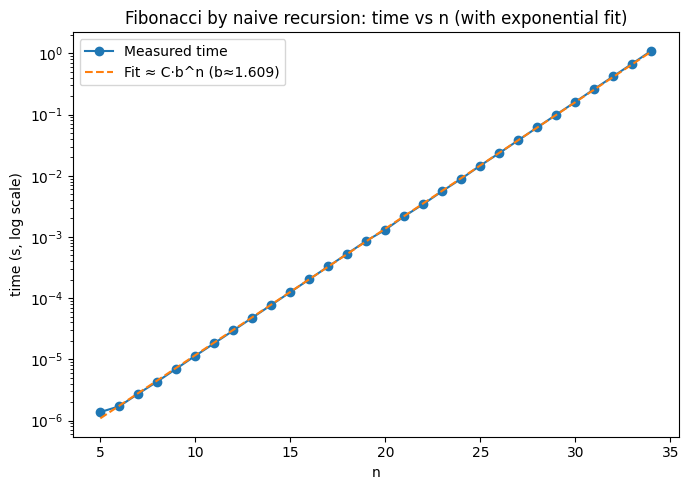

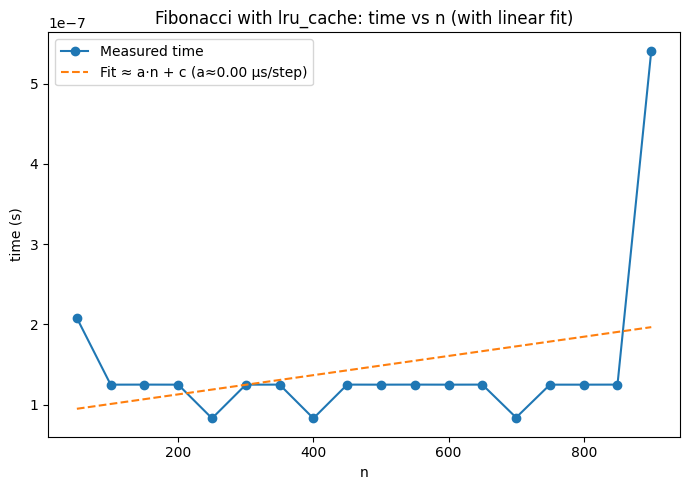

In [32]:
# Fibonacci timing: naive recursion vs recursion with lru_cache
# We measure runtime, estimate growth, and plot results.
import math
import time
from functools import lru_cache
from statistics import median

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Fibonacci definitions
# ----------------------------
def fib_naive(n: int) -> int:
    if n <= 1:
        return n
    return fib_naive(n - 1) + fib_naive(n - 2)

@lru_cache(maxsize=None)
def fib_cached(n: int) -> int:
    if n <= 1:
        return n
    return fib_cached(n - 1) + fib_cached(n - 2)

# Warm-up to avoid first-call overhead bias
fib_naive(5)
fib_cached.cache_clear()
fib_cached(5)
fib_cached.cache_clear()

# ----------------------------
# Timing helpers
# ----------------------------
def time_call(fn, n, repeats=3):
    times = []
    for _ in range(repeats):
        start = time.perf_counter()
        fn(n)
        end = time.perf_counter()
        times.append(end - start)
    return median(times)

# ----------------------------
# Collect timings
# ----------------------------
# Naive: keep n small (exponential time)
naive_ns = list(range(5, 35))  # 5..34
naive_times = [time_call(fib_naive, n, repeats=3) for n in naive_ns]

# Cached: we can go much bigger, but recursion depth ~ 1000; stay safely below
fib_cached.cache_clear()  # ensure full work is measured
cached_ns = list(range(50, 901, 50))  # 50,100,...,900
cached_times = [time_call(fib_cached, n, repeats=3) for n in cached_ns]

# ----------------------------
# Build DataFrames and save
# ----------------------------
df_naive = pd.DataFrame({"n": naive_ns, "time_s": naive_times})
df_cached = pd.DataFrame({"n": cached_ns, "time_s": cached_times})


# ----------------------------
# Fit models for "time complexity estimative"
# ----------------------------
# Naive recursion ~ C * b^n  -> log(time) ≈ log(C) + n*log(b)
x = np.array(naive_ns, dtype=float)
y = np.array([math.log(t) for t in naive_times], dtype=float)
A = np.vstack([x, np.ones_like(x)]).T
slope, intercept = np.linalg.lstsq(A, y, rcond=None)[0]
b_est = math.exp(slope)  # base of exponential
C_est = math.exp(intercept)

# Cached recursion ~ a*n + c (linear)
x2 = np.array(cached_ns, dtype=float)
y2 = np.array(cached_times, dtype=float)
A2 = np.vstack([x2, np.ones_like(x2)]).T
a_est, c_est = np.linalg.lstsq(A2, y2, rcond=None)[0]

# ----------------------------
# Plot: Naive recursion timings with exponential fit
# ----------------------------
plt.figure(figsize=(7, 5))
plt.plot(naive_ns, naive_times, marker="o", label="Measured time")
# Fitted curve
fit_naive = [C_est * (b_est ** n) for n in naive_ns]
plt.plot(naive_ns, fit_naive, linestyle="--", label=f"Fit ≈ C·b^n (b≈{b_est:.3f})")
plt.yscale("log")  # clearer for exponential growth
plt.xlabel("n")
plt.ylabel("time (s, log scale)")
plt.title("Fibonacci by naive recursion: time vs n (with exponential fit)")
plt.legend()
plt.tight_layout()
plt.show()

# ----------------------------
# Plot: Cached recursion timings with linear fit
# ----------------------------
plt.figure(figsize=(7, 5))
plt.plot(cached_ns, cached_times, marker="o", label="Measured time")
fit_cached = a_est * x2 + c_est
plt.plot(cached_ns, fit_cached, linestyle="--", label=f"Fit ≈ a·n + c (a≈{a_est*1e6:.2f} µs/step)")
plt.xlabel("n")
plt.ylabel("time (s)")
plt.title("Fibonacci with lru_cache: time vs n (with linear fit)")
plt.legend()
plt.tight_layout()
plt.show()
